In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
heart_data=pd.read_csv("/content/heart.csv")
print(heart_data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [10]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
heart_data.shape

(303, 14)

In [14]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
#statistical measures
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<ipython-input-19-74c442396847>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(heart_data['sex'], palette='Set2')


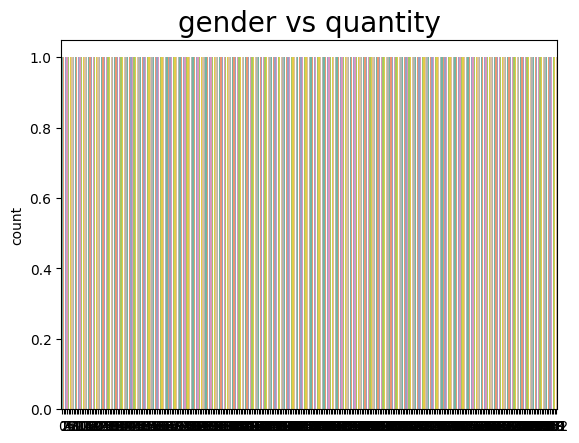

In [19]:
sns.countplot(heart_data['sex'], palette='Set2')
plt.title('gender vs quantity', fontsize=20)
plt.show()

<Axes: xlabel='age', ylabel='trestbps'>

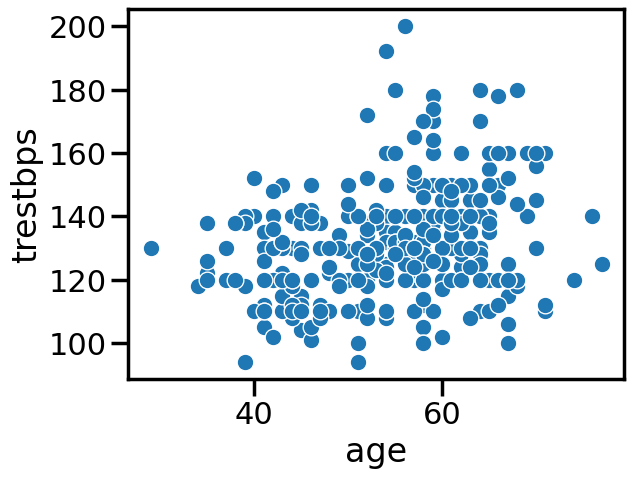

In [21]:
sns.set_context("poster")
sns.scatterplot(x='age', y='trestbps', data=heart_data)

<Axes: xlabel='age', ylabel='chol'>

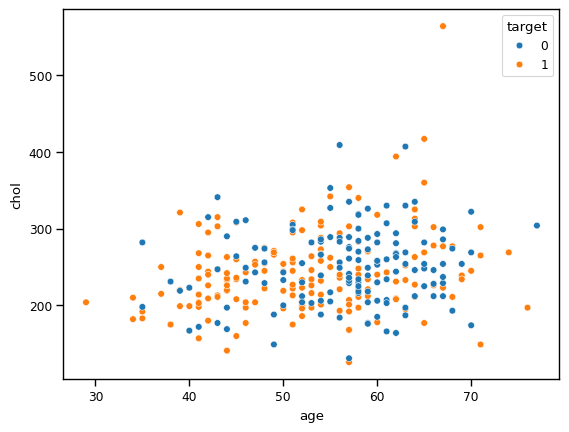

In [22]:
sns.set_context("paper")
sns.scatterplot(x='age', y='chol', data=heart_data, hue='target')

<Axes: xlabel='age', ylabel='restecg'>

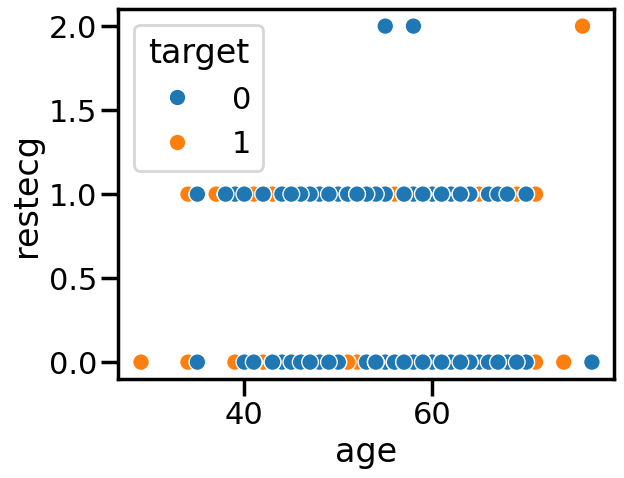

In [25]:
sns.set_context("poster")
sns.scatterplot(x='age', y= 'restecg', data=heart_data,hue='target')

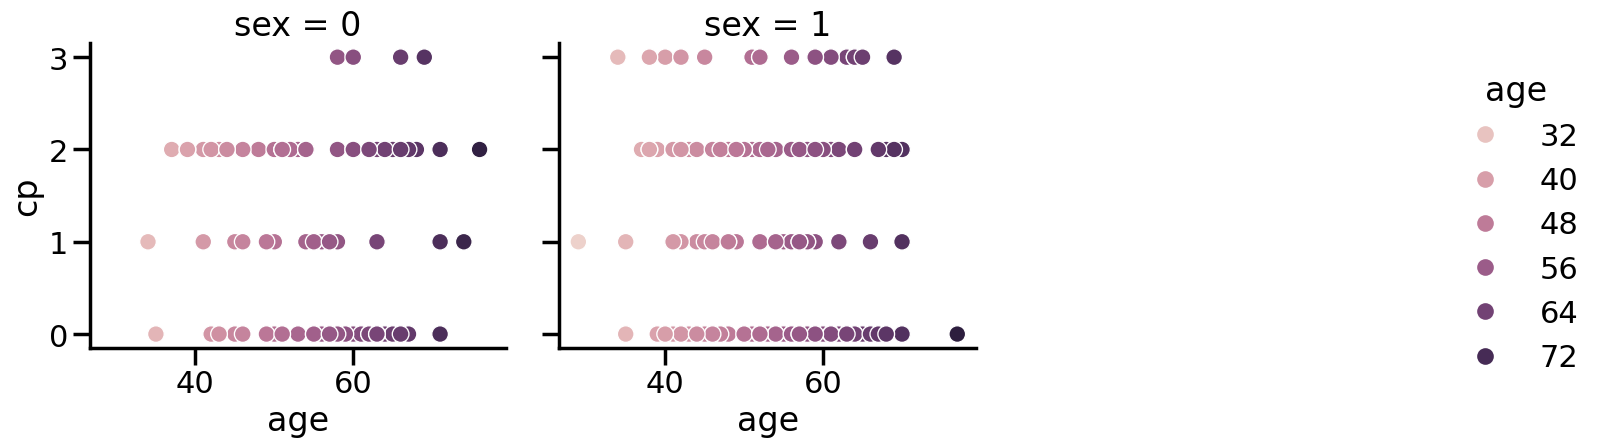

In [26]:
sns.set_context('poster')
sns.relplot(data=heart_data,x='age', y='cp', hue='age', col='sex',col_wrap=3)

<ipython-input-31-5897cb509f3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='age', col='target',data=heart_data,kind='count',palette='husl')


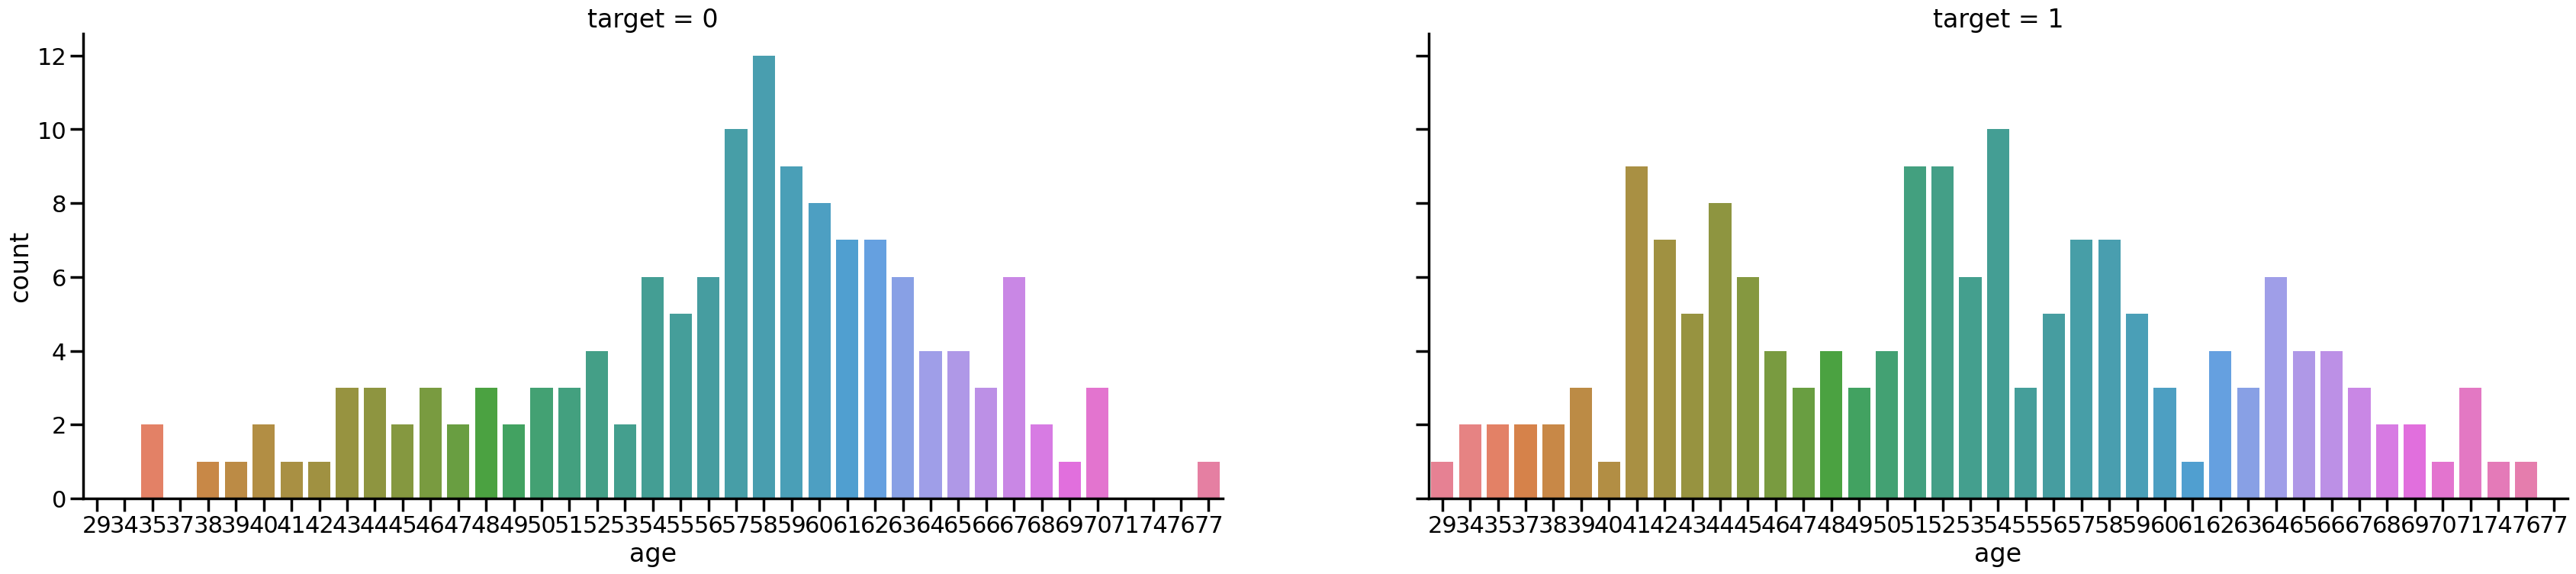

In [31]:
sns.set_context('poster')
sns.catplot(x='age', col='target',data=heart_data,kind='count',palette='husl')
plt.gcf().set_size_inches (40,10)
plt.show()

In [33]:
#checking distribution of target
heart_data['target'].value_counts()
#1-->stroke #e-->healty

target
1    165
0    138
Name: count, dtype: int64

In [34]:
Keheart data.drop(columns'target' axiswi)
Y-heart data target

SyntaxError: invalid syntax (<ipython-input-34-3b52ce5b42f5>, line 1)

In [ ]:
print(K)

In [ ]:
print(V)

In [ ]:
Xtrain, X_testy train, y testetrain test_split(X,Y, test Sizecil. 7, stratifysy, random_stat

In [ ]:
x train.shape

In [ ]:
print(X test.shape)

In [ ]:
Xishape

In [ ]:
#Modern training
#Logistic trung
sadel-logisticilegression()
model.fit(X train,Y_train)

In [ ]:
Logistlefiegression()

In [ ]:
anody evalant Yon
aucrunary scon on tratred dστα
X_train preciction-model.predict(K train)
Q Search
ENG
IN
16:53
Ersining data_accuracy accuracy_score(X_train_prediction, Y_train